## Data Dictionary

## products
| Column Name     | Data Type | Description                                    |
|-----------------|-----------|------------------------------------------------|
| ProductName     | String    | Name of the product                            |
| SupplierID      | Integer   | Unique identifier for the supplier             |
| CategoryID      | Integer   | Unique identifier for the category             |
| QuantityPerUnit | String    | Quantity of the product per unit               |
| UnitPrice       | Float     | Price per unit of the product                  |
| UnitsInStock    | Integer   | Number of units currently in stock             |
| UnitsOnOrder    | Integer   | Number of units currently on order             |
| ReorderLevel    | Integer   | Minimum number of units before reorder         |
| Discontinued    | Boolean   | Indicates if the product is discontinued (TRUE/FALSE) |

### categories
| Column Name  | Data Type | Description                                    |
|--------------|-----------|------------------------------------------------|
| CategoryName | String    | Name of the category                           |
| Description  | String    | Description of the category                    |

### orders
| Column Name    | Data Type | Description                                    |
|----------------|-----------|------------------------------------------------|
| OrderID        | Integer   | Unique identifier for the order                |
| CustomerID     | String    | Unique identifier for the customer             |
| EmployeeID     | Integer   | Unique identifier for the employee             |
| OrderDate      | Date      | Date when the order was placed                 |
| RequiredDate   | Date      | Date by which the order is required            |
| ShippedDate    | Date      | Date when the order was shipped                |
| ShipVia        | Integer   | Shipping method identifier                     |
| Freight        | Float     | Freight cost for the order                     |
| ShipName       | String    | Name of the shipper                            |
| ShipAddress    | String    | Shipping address                               |
| ShipCity       | String    | Shipping city                                  |
| ShipRegion     | String    | Shipping region                                |
| ShipPostalCode | String    | Shipping postal code                           |
| ShipCountry    | String    | Shipping country                               |

### order_details
| Column Name | Data Type | Description                                    |
|-------------|-----------|------------------------------------------------|
| OrderID     | Integer   | Unique identifier for the order                |
| ProductID   | Integer   | Unique identifier for the product              |
| UnitPrice   | Float     | Price per unit of the product at the time of the order |
| Quantity    | Integer   | Quantity of the product ordered                |
| Discount    | Float     | Discount applied to the product                |


### locations
| Column Name   | Data Type | Description                                      |
|---------------|-----------|--------------------------------------------------|
| CustomerID    | String    | Unique identifier for the customer               |
| Country       | String    | Country where the customer is located            |




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# import ipywidgets as widgets
# from ipywidgets import interact, HBox, Layout
from IPython.display import display


In [2]:
# Set the display format for float numbers to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

In [21]:
products_cols = ["ProductID","ProductName","CategoryID","UndiscountedUnitPrice","UnitsInStock","UnitsOnOrder","ReorderLevel","Discontinued"]
categories_cols = ["CategoryID","CategoryName"]
orders_cols = ["OrderID","CustomerID","OrderDate","ShipCountry"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols=orders_cols)
order_details = pd.read_csv("../data/order_details.csv")
locations = pd.read_csv("../data/customers.csv",usecols=['CustomerID', 'Country'])



In [22]:
display(products.head(3), categories.head(3), orders.head(3), order_details.head(3), locations.head(3))

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,17,Alice Mutton,6,$39.00,0,0,0,1
1,3,Aniseed Syrup,2,$10.00,13,70,25,0
2,40,Boston Crab Meat,8,$18.40,123,0,30,0


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,OrderID,CustomerID,OrderDate,ShipCountry
0,10389,BOTTM,1995-01-20,Canada
1,10390,ERNSH,1995-01-23,Austria
2,10391,DRACD,1995-01-23,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.00,12
1,10248,42,9.80,10
2,10248,72,34.80,5


,CustomerID,Country
0,ALFLI,Germany
1,ANATR,Mexico
2,ANTON,Mexico


In [23]:
display(products.info(),categories.info(),orders.info(),order_details.info(), locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   CategoryID             77 non-null     int64 
 3   UndiscountedUnitPrice  77 non-null     object
 4   UnitsInStock           77 non-null     int64 
 5   UnitsOnOrder           77 non-null     int64 
 6   ReorderLevel           77 non-null     int64 
 7   Discontinued           77 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.

None

None

None

None

None

## Data Preparation

### Cleaning Data

In [24]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

In [25]:
products[]

SyntaxError: invalid syntax (209165142.py, line 1)

In [26]:
products.loc[products["Cate"]]

KeyError: 'Cate'

### Merging the Dataframes

In [ ]:
# display(orders.head(), order_details.head())
orders_sales = pd.merge(orders, order_details, on="OrderID")
orders_sales.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60


In [8]:
orders_sales_locations = pd.merge(orders_sales, locations, on="CustomerID")
orders_sales_locations = orders_sales_locations.rename({'Country':"OrderCountry"}, axis=1)
orders_sales_locations.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity,OrderCountry
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20,Canada
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30,Canada
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60,Austria


In [9]:
sum(orders_sales_locations.ShipCountry != orders_sales_locations.OrderCountry)

0

In [10]:
# since ALL shipping coutries is the same as the order countries, I will drop one of the column
orders_sales_locations = orders_sales_locations.drop("ShipCountry", axis=1).rename({"OrderCountry":"Country"},axis=1)
orders_sales_locations.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada


In [11]:
products_with_categories = pd.merge(products, categories, on="CategoryID")
products_with_categories.head()

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,1,Chai,1,18.00,39,0,10,0,Beverages
1,2,Chang,1,19.00,17,40,25,0,Beverages
2,3,Aniseed Syrup,2,10.00,13,70,25,0,Condiments
3,4,Chef Anton's Cajun Seasoning,2,22.00,53,0,0,0,Condiments
4,5,Chef Anton's Gumbo Mix,2,21.35,0,0,0,1,Condiments


In [12]:
sum(products_with_categories.ProductID.duplicated())

0

In [ ]:
products_analysis = pd.merge(orders_sales_locations, products_with_categories, on = "ProductID")
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,PÃ¢tÃ© chinois,6,24.00,115,0,20,0,Meat/Poultry
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections


In [ ]:
products_analysis["TotalSales"] = products_analysis["DiscountedUnitPrice"]*products_analysis["Quantity"]
products_analysis["Discount"] = products_analysis["UndiscountedUnitPrice"]-products_analysis["DiscountedUnitPrice"]
products_analysis["%Discount"] = (products_analysis["Discount"]/products_analysis["UndiscountedUnitPrice"])*100
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,TotalSales,Discount,%Discount
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood,396.80,6.20,20.00
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,PÃ¢tÃ© chinois,6,24.00,115,0,20,0,Meat/Poultry,288.00,4.80,20.00
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections,788.00,9.90,20.08


In [31]:
# Example: Replace non-standard characters
products_analysis['ProductName'] = products_analysis['ProductName'].str.replace('\x9f', '')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'  # or any other font that supports the characters

In [32]:
products_analysis.loc[products_analysis["CategoryName"]=="Condiments"]["ProductName"]

30      Original Frankfurter grÃ¼ne SoÃe
36      Louisiana Fiery Hot Pepper Sauce
39                          Vegie-spread
45                         Aniseed Syrup
62                          Gula Malacca
                      ...               
2132        Chef Anton's Cajun Seasoning
2133        Grandma's Boysenberry Spread
2135          Northwoods Cranberry Sauce
2151           Louisiana Hot Spiced Okra
2154    Original Frankfurter grÃ¼ne SoÃe
Name: ProductName, Length: 216, dtype: object

## Analysis

### Top 10 Overall Products by Revenue
__Objective__:
To dentify the top products contributing the most to total revenue, and to establish benchmarks for product performance in terms of revenue.

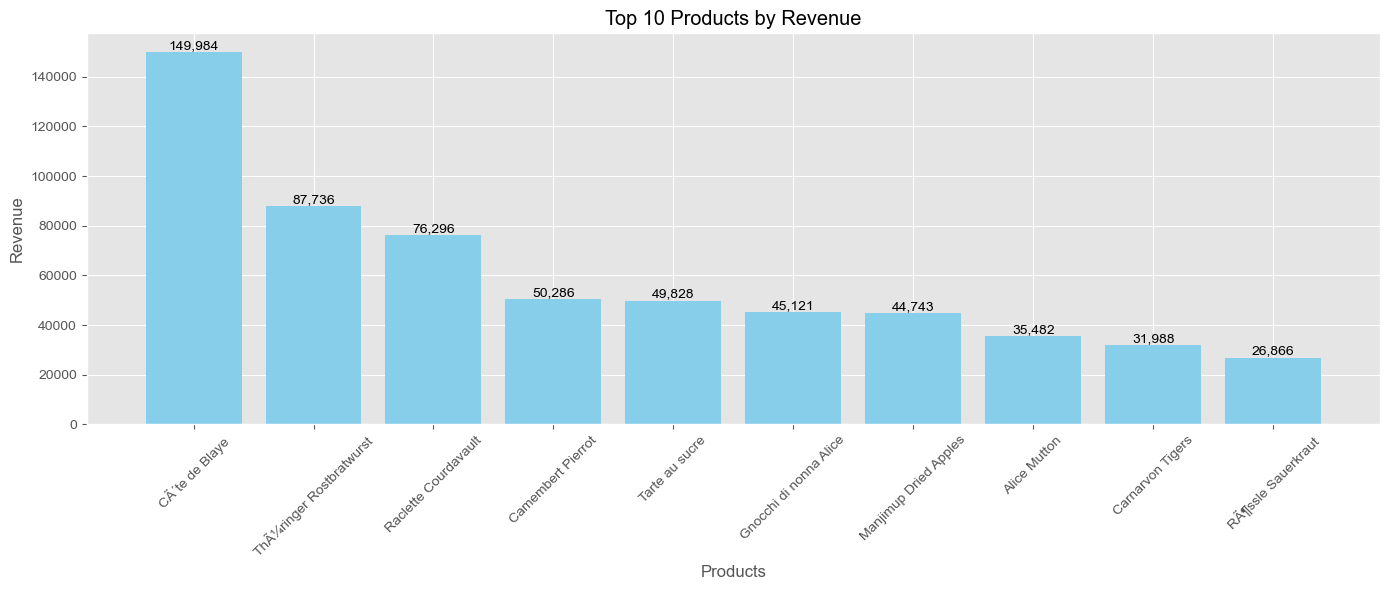

In [33]:
top_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                           .reset_index()
                           .sort_values("TotalSales", ascending=False)
                           .head(10)
)

# Plot sales performance
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax.set_title('Top 10 Products by Revenue')
ax.set_xlabel('Products')
ax.set_ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights from the Analysis

1. **Top Revenue-Generating Products**: The bar chart identifies the top 10 products contributing the most to total revenue. The product with the highest revenue generates $149,984, while the tenth product generates $26,866.

2. **Revenue Distribution**: There is a significant disparity in revenue among the top products. The top product generates nearly six times the revenue of the tenth product, indicating a heavy reliance on a few high-performing products.

3. **Performance Benchmarks**: The top products serve as benchmarks for other products. Products not in the top 10 can be evaluated against these benchmarks to identify gaps and opportunities for improvement.

4. **Revenue Concentration**: A small number of products contribute disproportionately to the total revenue. This concentration suggests that the business is highly dependent on these products for its financial performance.

5. **Market Trends**: The top products may reflect current market trends or consumer preferences. Understanding why these products are performing well can provide insights into what customers value most.

### Recommendations for Business Decision-Making

1. **Focus on High-Performing Products**: Allocate more resources to the top-performing products to maximize revenue. This could include targeted marketing campaigns, inventory prioritization, and enhanced customer support.

2. **Diversify Revenue Streams**: To reduce dependency on a few products, consider diversifying the product portfolio. This could involve developing new products or improving underperforming ones to spread revenue more evenly.

3. **Product Development**: Use insights from the top-performing products to guide product development. Identify common features or attributes that make these products successful and incorporate them into new or existing products.

4. **Inventory Management**: Ensure that high-demand products are always in stock to avoid lost sales opportunities. Implement inventory management strategies that prioritize these products.

5. **Customer Insights**: Conduct further analysis to understand why these products are popular. Gather customer feedback and market research to identify key drivers of their success.

6. **Performance Improvement**: For products not in the top 10, analyze their performance and identify areas for improvement. This could involve pricing strategies, product enhancements, or targeted promotions.

7. **Strategic Planning**: Use the insights from this analysis to inform long-term strategic planning. Focus on sustaining the performance of top products while exploring opportunities to grow revenue from other products.

By leveraging these insights and recommendations, the business can make informed decisions to optimize revenue, improve product performance, and achieve sustainable growth.

### Top 10 Products by Revenue for each Category

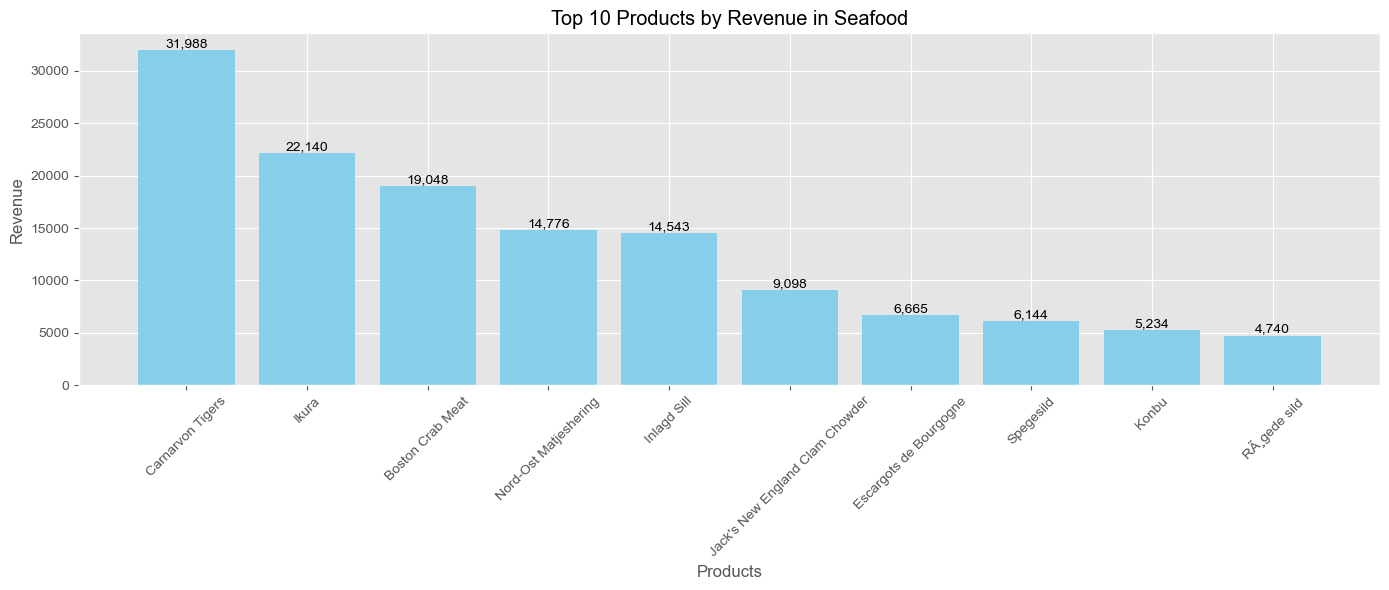

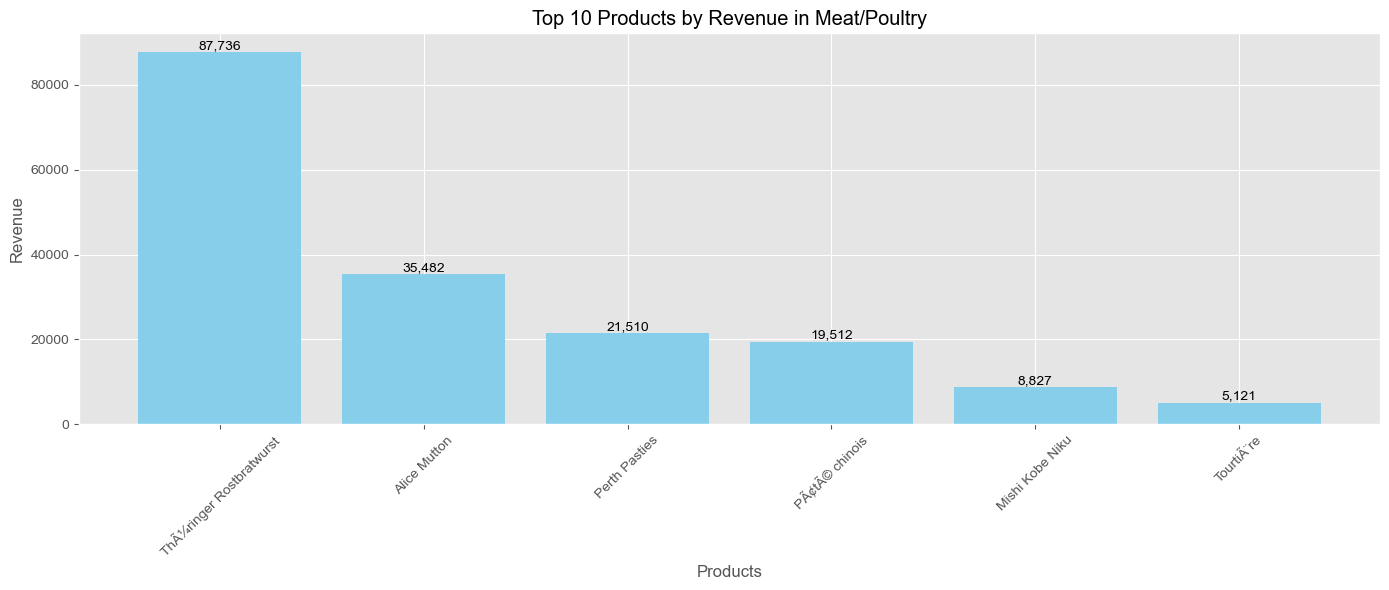

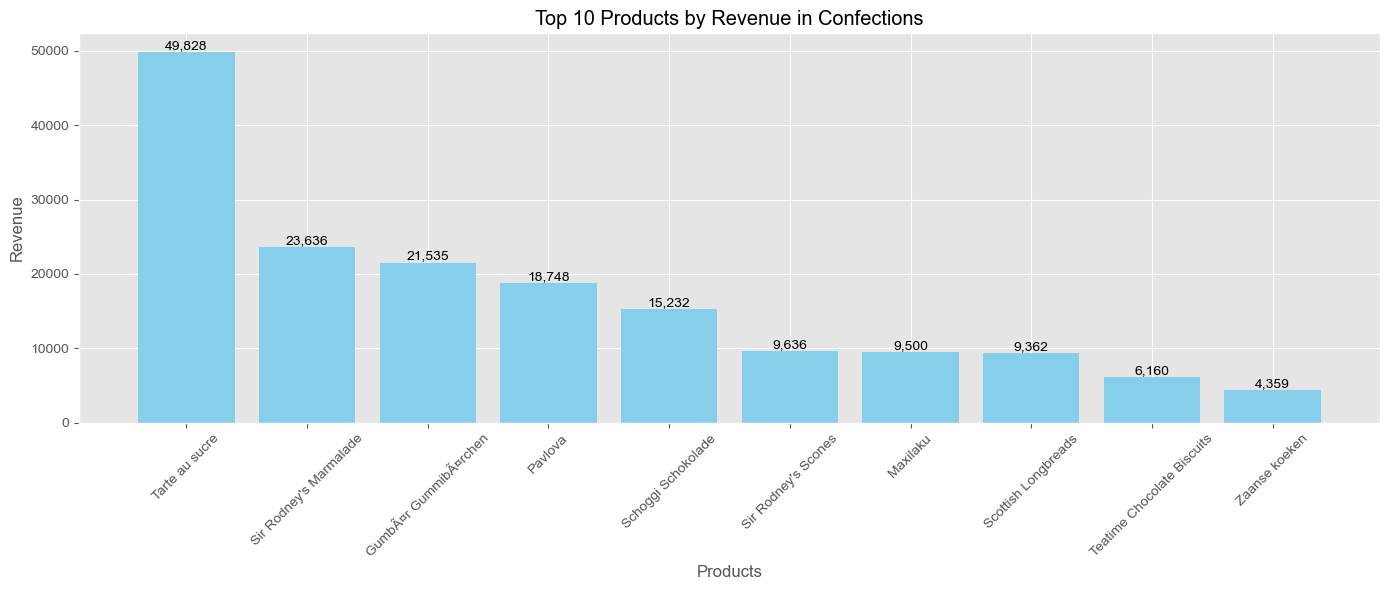

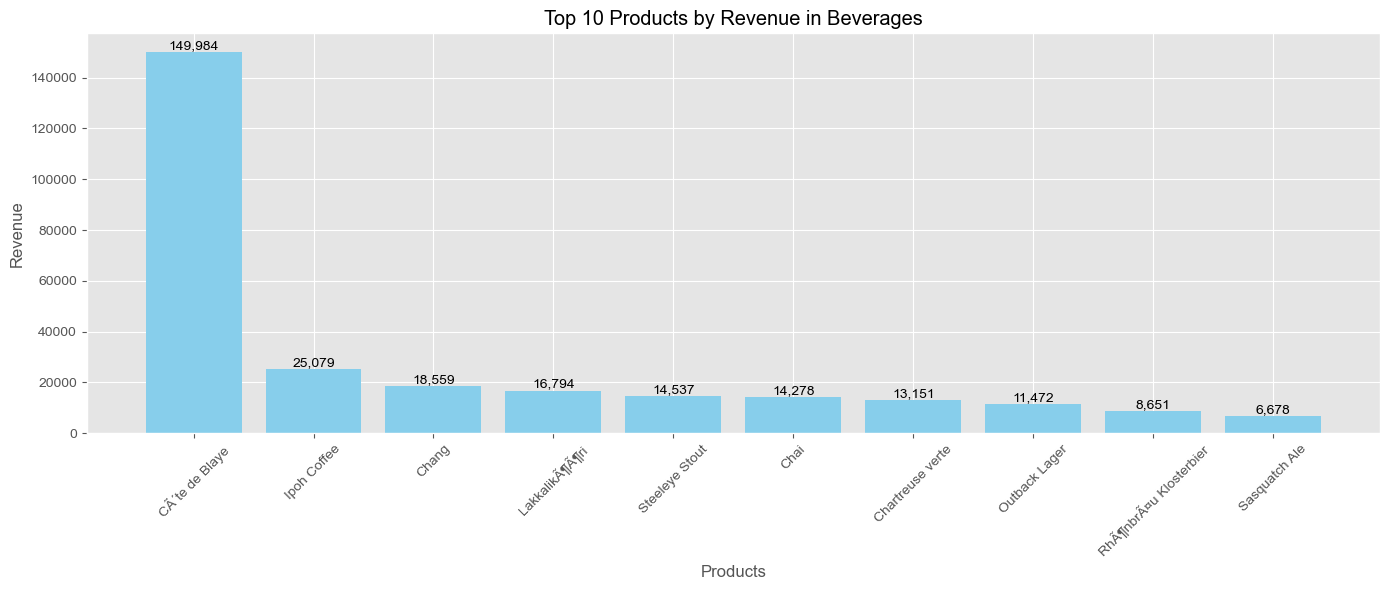

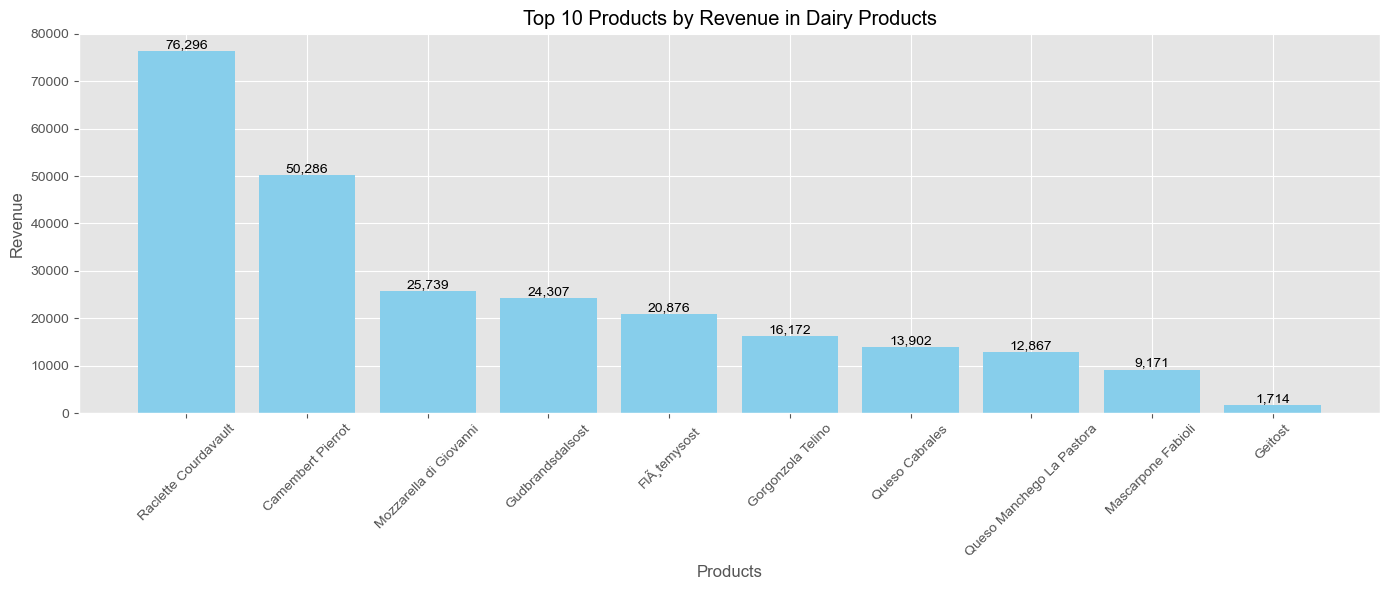

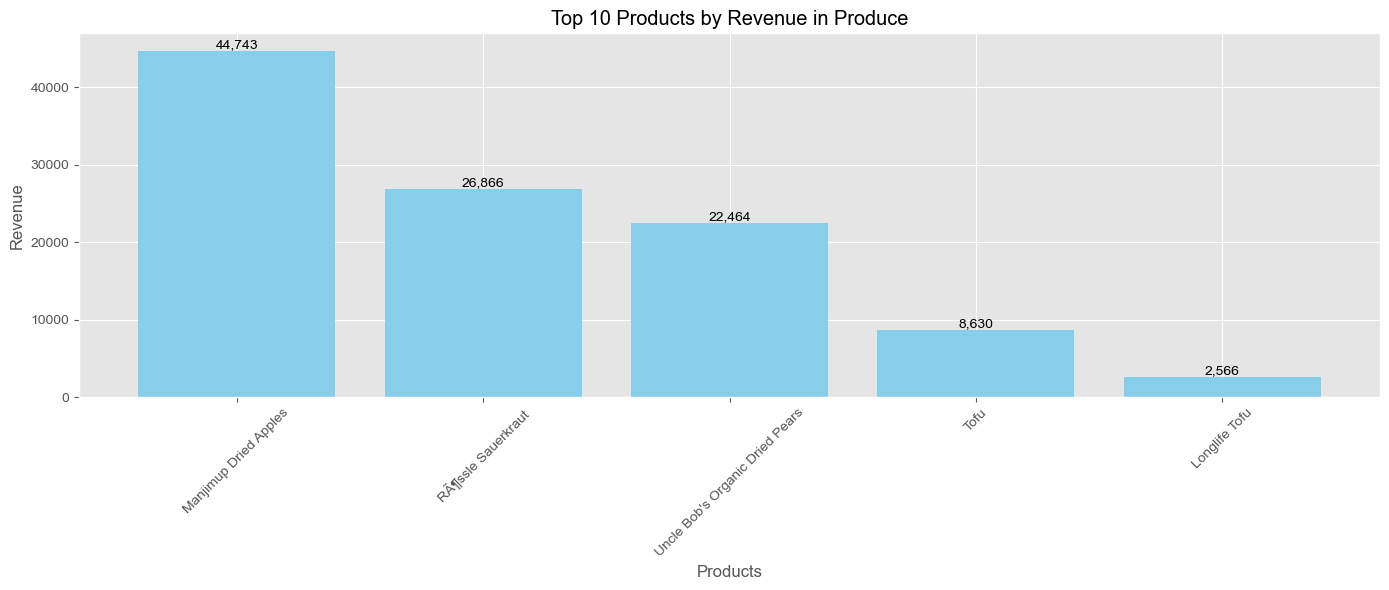

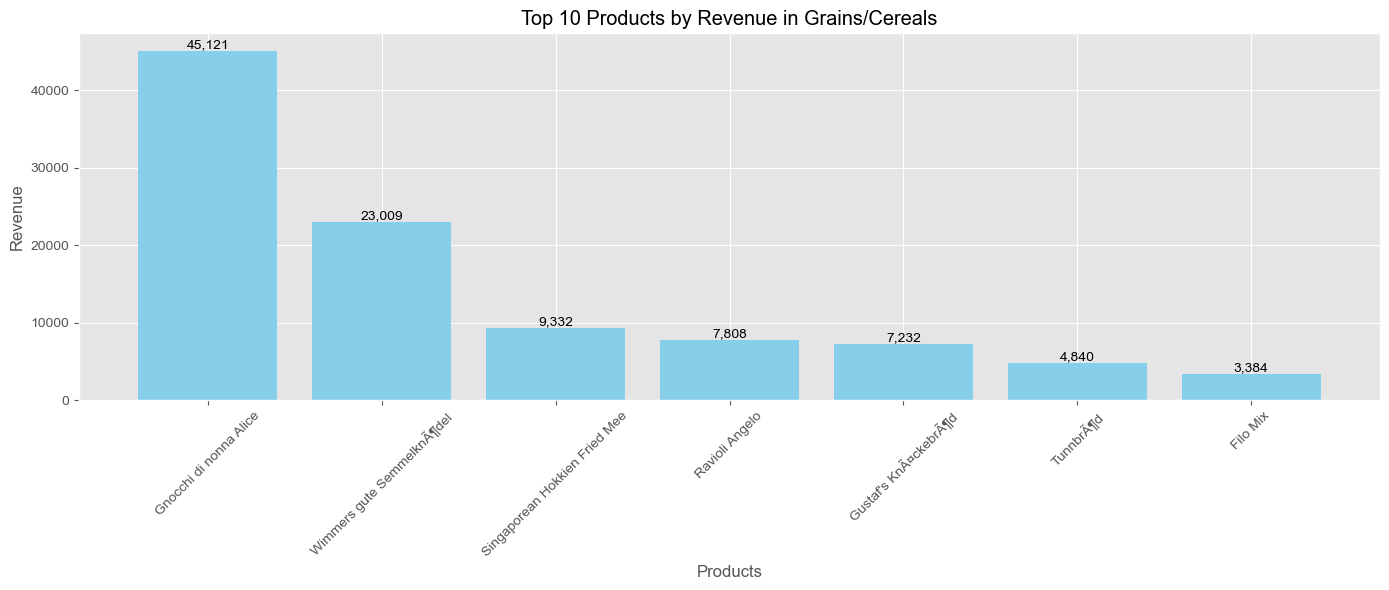

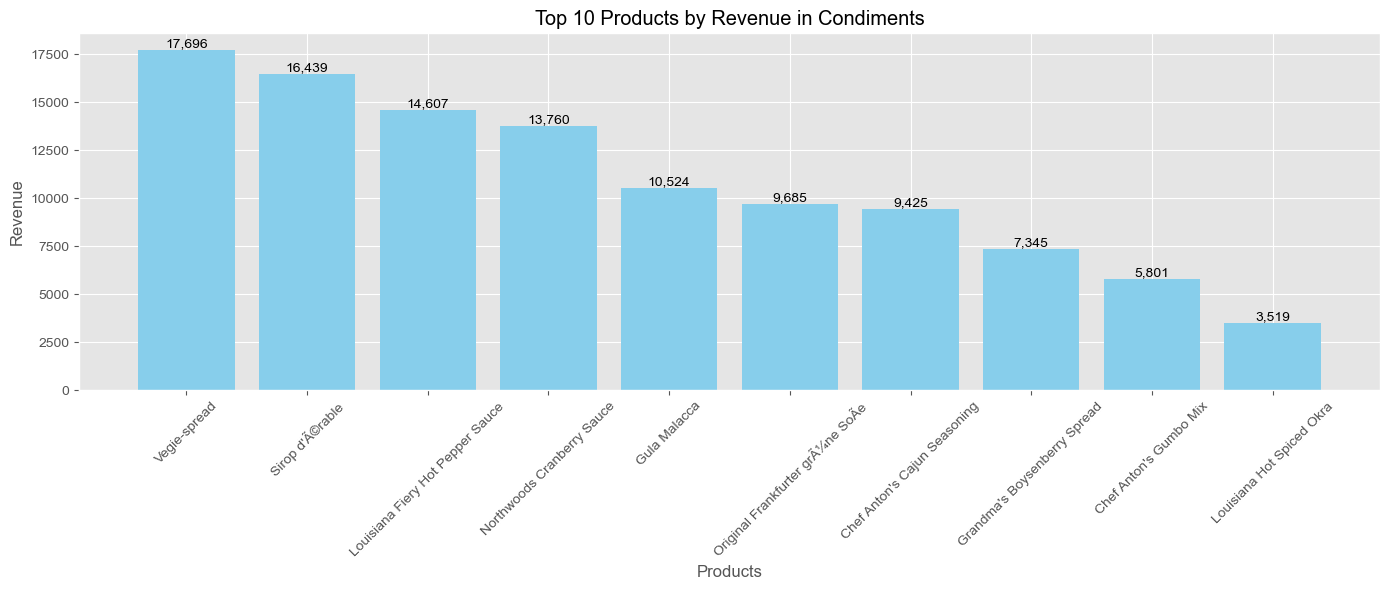

In [34]:
import matplotlib.pyplot as plt

# Loop over each category
for category in products_analysis['CategoryName'].unique():
    top_products_by_revenue = (products_analysis[products_analysis['CategoryName'] == category]
                               .groupby('ProductName')['TotalSales'].sum()
                               .reset_index()
                               .sort_values("TotalSales", ascending=False)
                               .head(10)
    )

    # Plot sales performance
    fig, ax = plt.subplots(figsize=(14, 6))
    bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax.set_title(f'Top 10 Products by Revenue in {category}')
    ax.set_xlabel('Products')
    ax.set_ylabel('Revenue')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
# Create dropdown widget with "All" as the default option
category_options = ['All'] + list(products_analysis['CategoryName'].unique())
category_dropdown = widgets.Dropdown(
    options=category_options,
    value='All',
    description='Category Name:',
    disabled=False,
    layout=Layout(width='200px')  # Adjust the width as needed
)

# Function to update the plot based on selected category
def update_plot(category):
    if category == 'All':
        filtered_data = products_analysis
    else:
        filtered_data = products_analysis[products_analysis['CategoryName'] == category]
    
    top_products_by_revenue = (filtered_data.groupby('ProductName')['TotalSales'].sum()
                               .reset_index()
                               .sort_values("TotalSales", ascending=False)
                               .head(10))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax.set_title('Top 10 Products by Revenue')
    ax.set_xlabel('Products')
    ax.set_ylabel('Revenue')
    plt.xticks(rotation=45)
    
    plt.show()

# Use interact to link the dropdown to the update_plot function
output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output(wait=True)
        update_plot(change['new'])

category_dropdown.observe(on_change, names='value')

# Display the dropdown and the plot side by side
display(HBox([output, category_dropdown]))

# Initial plot
update_plot(category_dropdown.value)